# Data Mining CMP-7023B
## Lab 6: Supervised Learning - Classification Part 2 - more advanced practice sample solutions

## Heart Disease UCI
In this practice sheet we are using Heart Disease dataset from UCI (Machine Learning Repository)

### Content

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them https://archive.ics.uci.edu/ml/datasets/heart+disease

Attribute Information:
- age : age in years
- sex: sex (1 = male; 0 = female)
- cp : chest pain type (4 values)
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
- trestbps: resting blood pressure
- chol: serum cholestoral in mg/dl 
- fbs: fasting blood sugar > 120 mg/dl  (1 = true; 0 = false)
- restecg: resting electrocardiographic results (values 0,1,2)
    - Value 0: normal
    - Value 1: having ST-T wave abnormality
    - Value 2: showing left ventricular hypertrophy
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak = ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target (num): diagnosis of heart disease (angiographic disease status) (<b> the predicted attribute </b>)
    - Value 0: < 50% diameter narrowing
    - Value 1: > 50% diameter narrowing

### Objective:
The objective of this lab exercise is to familiarize students with classification tasks, parameter tuning, and model evaluation using the Heart Disease UCI dataset.

## Tasks:
### Task 1: Data Exploration:
- Load the Heart Disease UCI dataset.
- Perform initial Exploratory Data Analysis (EDA).
- Identify features and the target variable.
- Check for missing values, outliers, and perform data cleanng.
ng.

#### Starting out: loading data and libraries
We begin by loading the necessary libraries for the work we are going to do in this lab.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, Normalizer, PowerTransformer, QuantileTransformer, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import warnings

warnings.filterwarnings('ignore') #ignore warnings

- Download the dataset from blackboard and read it

In [2]:
#designate the path where you saved your OEC data
heart_data_path = "C:\DM-DATA\heart.csv"

#Load the data using pandas read_csv function. 
orig_data = pd.read_csv(heart_data_path)

#get the data out, leaving behind the target column (the last feature).
X = orig_data.iloc[:, :-1]
#extract the target column.
y = orig_data["target"] 

print(X)
print(y)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

#### Check data types and missing values

In [3]:
# Check data types and missing values
print("\nData types and missing values:")
print(X.info())


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 30.9 KB
None


### Explore the Data

#### Visualize the distribution of the target variable

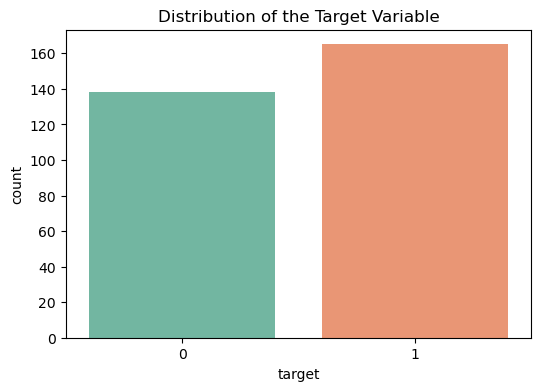

In [4]:
# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x="target", data=orig_data, palette="Set2")
plt.title("Distribution of the Target Variable")
plt.show()

#### Visualize the distribution of numerical features

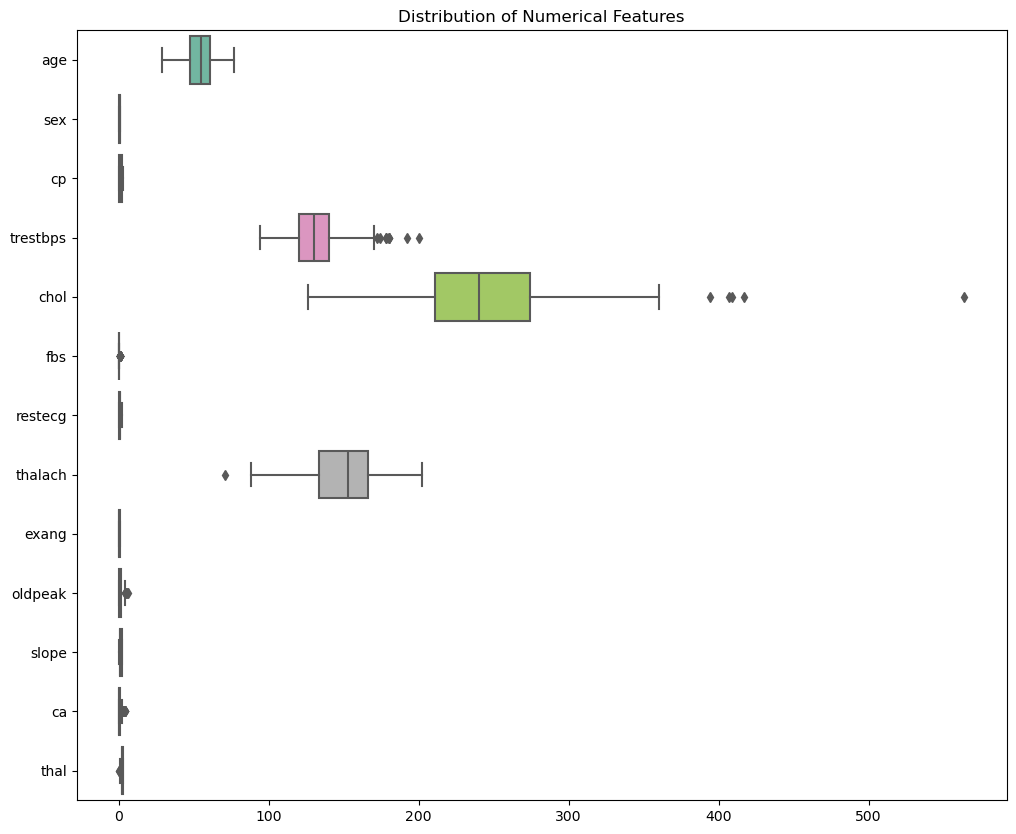

In [5]:
# Visualize the distribution of numerical features
plt.figure(figsize=(12, 10))
sns.boxplot(data=X, orient="h", palette="Set2")
plt.title("Distribution of Numerical Features")
plt.show()

#### Check for missing values

In [6]:
# Check for missing values
missing_values = X.isnull().sum()
print("\nMissing values per feature:")
print(missing_values)


Missing values per feature:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64



#### Look at the distributions or histograms of individual attributes.
Data describtions:

In [7]:
X.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


Or use transpose "T"

In [8]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


#### Examine the mean and standard deviation for each attribute.

In [9]:
X.agg({ col:['mean', 'std'] for col in X.columns})

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277


#### Check for outliers using box plots

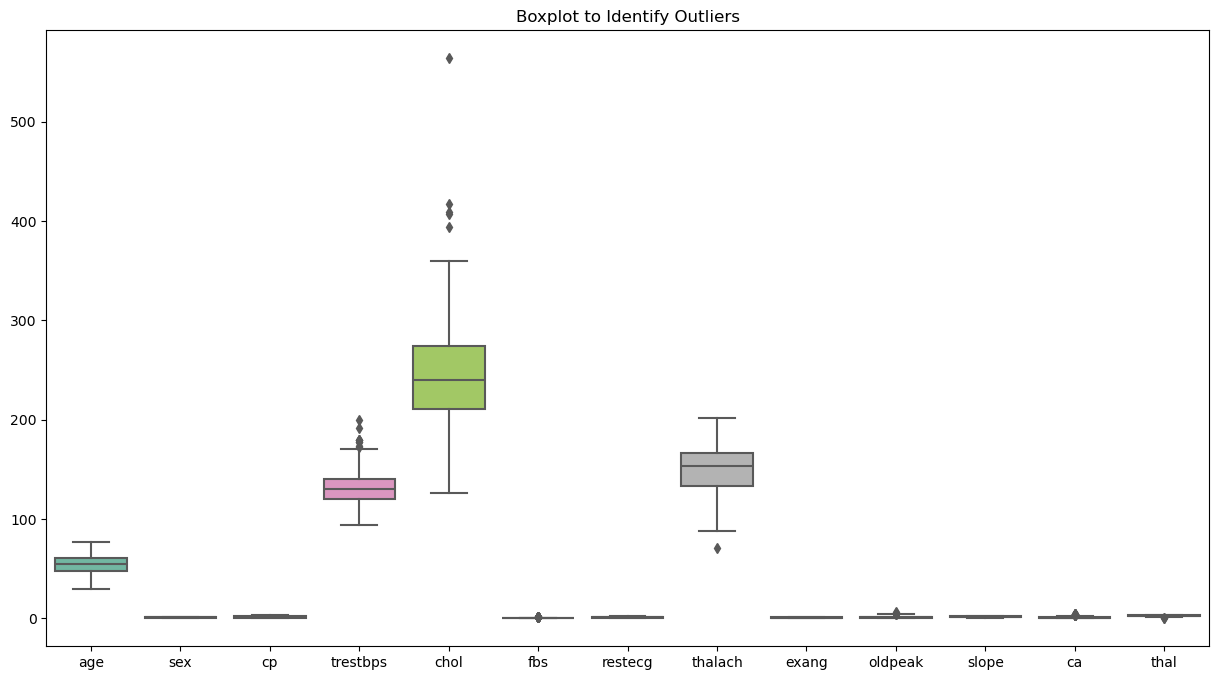

In [10]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=X, palette="Set2")
plt.title("Boxplot to Identify Outliers")
plt.show()

#### Perform data cleaning (handle missing values, outliers, etc.)
For simplicity, you can fill missing values with the mean for numerical features

In [11]:
X.fillna(X.mean(), inplace=True)

#### Verify that missing values are filled

In [12]:
print("\nMissing values after filling:")
print(X.isnull().sum())


Missing values after filling:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64


### Task 2: Classification Task: 
** Note: Assume preprocessing has been done before this task. 
- Split the dataset into training and testing sets.
  * random_state=41: setting a random_state ensures reproducibility. If you use the same random seed, you will get the same results each time you run the code.
  * stratify=y: ensures that the proportion of each class in y is maintained in both the training and testing sets. This is particularly important when dealing with imbalanced datasets or when the distribution of classes in the target variable is essential for model training and evaluation.
- Choose a classification algorithm (or a bunch) (e.g. Decision Trees, SVM, Nueral Network, Randome forest).
- Train the model using the training set. - Make predictions on thetesting set.
- Evaluate the model's performance using appropriate metrics (accuracy, precision, recall, F1-score).
- Generate the classification report and confusion matrix.

In [13]:
# Split the dataset into training, testing, and validation sets using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3, stratify=y)                                      

In [14]:
# Choose a classification algorithm (Decision Tree Classifier as an example)
model = DecisionTreeClassifier(random_state=3)

In [15]:
# Train the model using the training set
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=3)

In [16]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [17]:
# Evaluate the model's performance using appropriate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.6374
Precision: 0.6735
Recall: 0.6600
F1 Score: 0.6667


In [18]:
# Generate the classification report
report = classification_report(y_test, y_pred)

# Display the classification report
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.61      0.60        41
           1       0.67      0.66      0.67        50

    accuracy                           0.64        91
   macro avg       0.63      0.63      0.63        91
weighted avg       0.64      0.64      0.64        91



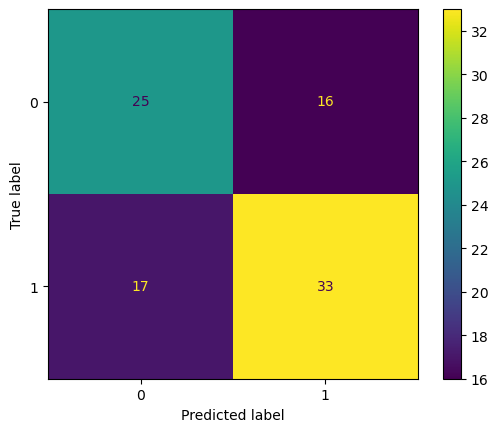

In [19]:

plot_confusion_matrix(model, X_test, y_test)

### Task 3: Parameter Tuning:
- Investigate the hyperparameters of the chosen algorithm.
- Create a pipeline with scaling/transformation and classification stages.
- Use grid search or random search to find the optimal hyperparameters. 
- Re-train the model with the tuned hyperparameters. 
- Evaluate the tuned model on the testing set.
- Assess overfitting or underfitting using the accuracy metric (the tuned model).
- Plot the precision and recall for the built pipeline.

In [20]:
# Choose classification algorithms (Decision Tree)
classifier_decision_tree = DecisionTreeClassifier(random_state=3)

# Define hyperparameter grids for grid search
param_grid_decision_tree = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Create a pipeline with scaling/transformation and classification stages
pipeline_decision_tree = Pipeline([
    ('scaler', StandardScaler()), 
    ('classifier', classifier_decision_tree)
])

# Perform Grid Search to find the optimal hyperparameters for Decision Tree
grid_search_decision_tree = GridSearchCV(estimator=pipeline_decision_tree, param_grid=param_grid_decision_tree, cv=5, scoring='accuracy')
grid_search_decision_tree.fit(X_train, y_train)

# Get the best hyperparameters for Decision Tree
best_params_decision_tree = grid_search_decision_tree.best_params_
print("Best Hyperparameters (Decision Tree):", best_params_decision_tree)

# Retrain the Decision Tree model with the tuned hyperparameters
tuned_pipeline_decision_tree = grid_search_decision_tree.best_estimator_
tuned_pipeline_decision_tree.fit(X_train, y_train)

# Evaluate the tuned Decision Tree model on the testing set
y_pred_tuned_decision_tree = tuned_pipeline_decision_tree.predict(X_test)

# Evaluate the model's performance for Decision Tree
accuracy_tuned_decision_tree = accuracy_score(y_test, y_pred_tuned_decision_tree)

print("\nPerformance of the Tuned Decision Tree Model:")
print(f"Accuracy on Testing Set: {accuracy_tuned_decision_tree:.4f}")


Best Hyperparameters (Decision Tree): {'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2}

Performance of the Tuned Decision Tree Model:
Accuracy on Testing Set: 0.7363


In [21]:
# Evaluate the tuned model on the testing set
y_pred_tuned_decision_tree = tuned_pipeline_decision_tree.predict(X_test)

# Generate the classification report
report_tuned_decision_tree = classification_report(y_test, y_pred_tuned_decision_tree)

# Display the evaluation metrics for the tuned model
print("\nPerformance of the Tuned Model:")
print(f"Accuracy: {accuracy_tuned_decision_tree:.4f}")
print("\nClassification Report:")
print(report_tuned_decision_tree)


Performance of the Tuned Model:
Accuracy: 0.7363

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.80      0.73        41
           1       0.81      0.68      0.74        50

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.74        91
weighted avg       0.75      0.74      0.74        91



In [22]:
# Assess overfitting or underfitting using the accuracy metric (the tuned model).

# Make predictions on both training and testing sets
y_pred_train_decision_tree = tuned_pipeline_decision_tree.predict(X_train)
y_pred_test_decision_tree = tuned_pipeline_decision_tree.predict(X_test)

# Evaluate the model's performance on both sets
accuracy_train_decision_tree = accuracy_score(y_train, y_pred_train_decision_tree)
accuracy_test_decision_tree = accuracy_score(y_test, y_pred_test_decision_tree)

# Additional metrics
precision_train_decision_tree = precision_score(y_train, y_pred_train_decision_tree)
recall_train_decision_tree = recall_score(y_train, y_pred_train_decision_tree)
f1_train_decision_tree = f1_score(y_train, y_pred_train_decision_tree)

precision_test_decision_tree = precision_score(y_test, y_pred_test_decision_tree)
recall_test_decision_tree = recall_score(y_test, y_pred_test_decision_tree)
f1_test_decision_tree = f1_score(y_test, y_pred_test_decision_tree)

# Display the accuracies and additional metrics for both sets
print("Metrics on Training Set:")
print(f"Accuracy: {accuracy_train_decision_tree:.4f}, Precision: {precision_train_decision_tree:.4f}, Recall: {recall_train_decision_tree:.4f}, F1-Score: {f1_train_decision_tree:.4f}")

print("\nMetrics on Testing Set:")
print(f"Accuracy: {accuracy_test_decision_tree:.4f}, Precision: {precision_test_decision_tree:.4f}, Recall: {recall_test_decision_tree:.4f}, F1-Score: {f1_test_decision_tree:.4f}")

# Assess overfitting or underfitting
if accuracy_train_decision_tree  > accuracy_test_decision_tree :
    print("The Decision Tree model might be overfitted.")
elif accuracy_train_decision_tree  < accuracy_test_decision_tree :
    print("The Decision Tree model might be underfitted.")
else:
    print("The Decision Tree model seems well-fitted.")

Metrics on Training Set:
Accuracy: 0.9104, Precision: 0.9528, Recall: 0.8783, F1-Score: 0.9140

Metrics on Testing Set:
Accuracy: 0.7363, Precision: 0.8095, Recall: 0.6800, F1-Score: 0.7391
The Decision Tree model might be overfitted.


### classification algorithms (SVC)

In [23]:
# Choose classification algorithms (SVC)
classifier_svc = SVC(random_state=3)

# Define hyperparameter grids for grid search
param_grid_svc = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf', 'poly'],
    'classifier__gamma': ['scale', 'auto']
}

# Create a pipeline with scaling/transformation and classification stages
pipeline_svc = Pipeline([
    ('scaler', StandardScaler()),  # Add any necessary scaling or transformations
    ('classifier', classifier_svc)
])

# Perform Grid Search to find the optimal hyperparameters for SVC
grid_search_svc = GridSearchCV(estimator=pipeline_svc, param_grid=param_grid_svc, cv=5, scoring='accuracy')
grid_search_svc.fit(X_train, y_train)

# Get the best hyperparameters for SVC
best_params_svc = grid_search_svc.best_params_
print("\nBest Hyperparameters (SVC):", best_params_svc)

# Retrain the SVC model with the tuned hyperparameters
tuned_pipeline_svc = grid_search_svc.best_estimator_
tuned_pipeline_svc.fit(X_train, y_train)

# Evaluate the tuned SVC model on the testing set
y_pred_tuned_svc = tuned_pipeline_svc.predict(X_test)

# Evaluate the model's performance for SVC
accuracy_tuned_svc = accuracy_score(y_test, y_pred_tuned_svc)
print("\nPerformance of the Tuned SVC Model:")
print(f"Accuracy on Testing Set: {accuracy_tuned_svc:.4f}")


Best Hyperparameters (SVC): {'classifier__C': 0.1, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}

Performance of the Tuned SVC Model:
Accuracy on Testing Set: 0.8132


In [24]:
# Evaluate the tuned model on the testing set
y_pred_tuned_svc = tuned_pipeline_svc.predict(X_test)

# Generate the classification report
report_tuned_svc = classification_report(y_test, y_pred_tuned_svc)

# Display the evaluation metrics for the tuned model
print("\nPerformance of the Tuned Model:")
print(f"Accuracy: {accuracy_tuned_svc:.4f}")
print("\nClassification Report:")
print(report_tuned_svc)


Performance of the Tuned Model:
Accuracy: 0.8132

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.71      0.77        41
           1       0.79      0.90      0.84        50

    accuracy                           0.81        91
   macro avg       0.82      0.80      0.81        91
weighted avg       0.82      0.81      0.81        91



In [25]:
#Assess overfitting or underfitting using the accuracy metric (the tuned model).

# Make predictions on both training and testing sets
y_pred_train_svc = tuned_pipeline_svc.predict(X_train)
y_pred_test_svc = tuned_pipeline_svc.predict(X_test)

# Evaluate the model's performance on both sets
accuracy_train_svc = accuracy_score(y_train, y_pred_train_svc)
accuracy_test_svc = accuracy_score(y_test, y_pred_test_svc)

# Additional metrics
precision_train_svc = precision_score(y_train, y_pred_train_svc)
recall_train_svc = recall_score(y_train, y_pred_train_svc)
f1_train_svc = f1_score(y_train, y_pred_train_svc)

precision_test_svc = precision_score(y_test, y_pred_test_svc)
recall_test_svc = recall_score(y_test, y_pred_test_svc)
f1_test_svc = f1_score(y_test, y_pred_test_svc)

# Display the accuracies and additional metrics for both sets
print("Metrics on Training Set:")
print(f"Accuracy: {accuracy_train_svc:.4f}, Precision: {precision_train_svc:.4f}, Recall: {recall_train_svc:.4f}, F1-Score: {f1_train_svc:.4f}")

print("\nMetrics on Testing Set:")
print(f"Accuracy: {accuracy_test_svc:.4f}, Precision: {precision_test_svc:.4f}, Recall: {recall_test_svc:.4f}, F1-Score: {f1_test_svc:.4f}")

# Assess overfitting or underfitting
if accuracy_train_svc  > accuracy_test_svc :
    print("The SVC model might be overfitted.")
elif accuracy_train_svc  < accuracy_test_svc :
    print("The SVC model might be underfitted.")
else:
    print("The SVC model seems well-fitted.")

Metrics on Training Set:
Accuracy: 0.8538, Precision: 0.8231, Recall: 0.9304, F1-Score: 0.8735

Metrics on Testing Set:
Accuracy: 0.8132, Precision: 0.7895, Recall: 0.9000, F1-Score: 0.8411
The SVC model might be overfitted.


#### Plot the precision and recall for the pipeline you have built

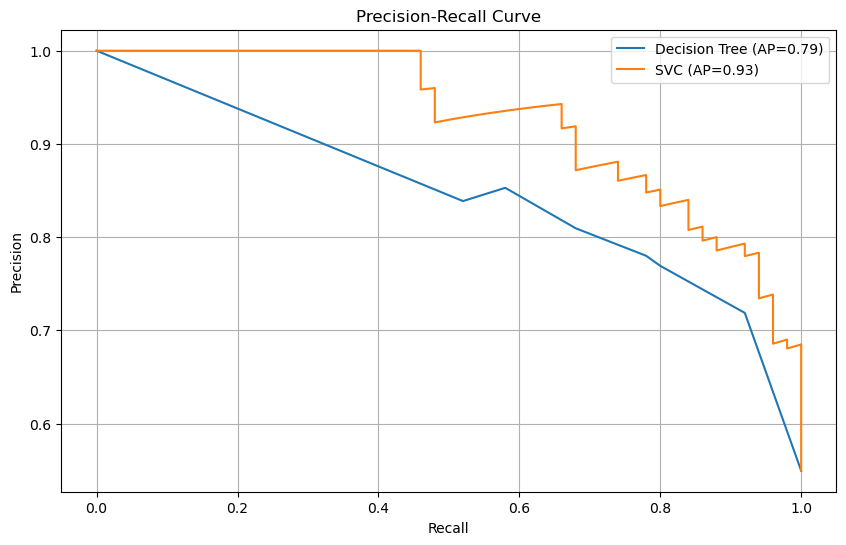

In [26]:
# Predict probabilities for each class for Decision Tree
probas_decision_tree = tuned_pipeline_decision_tree.predict_proba(X_test)
precision_decision_tree, recall_decision_tree, _ = precision_recall_curve(y_test, probas_decision_tree[:, 1])
average_precision_decision_tree = average_precision_score(y_test, probas_decision_tree[:, 1])

# Predict probabilities for each class for SVC
probas_svc = tuned_pipeline_svc.decision_function(X_test)
precision_svc, recall_svc, _ = precision_recall_curve(y_test, probas_svc)
average_precision_svc = average_precision_score(y_test, probas_svc)

# Plot Precision-Recall curves
plt.figure(figsize=(10, 6))

# Decision Tree
plt.plot(recall_decision_tree, precision_decision_tree, label=f'Decision Tree (AP={average_precision_decision_tree:.2f})')

# SVC
plt.plot(recall_svc, precision_svc, label=f'SVC (AP={average_precision_svc:.2f})')

# Plot settings
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

### Task 4: Model Comparison 
- Choose another classification algorithm (e.g. SVC, Decision Tree, Random Forest).
- Train the second model using the same training set.
- Compare the performance of the two models using appropriate metrics:
    - Accuracy
    - Precision
    - Recall
    - F1-Score
- Select the best-performing model.


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Choose another classification algorithm (Random Forest as an example)
classifier_random_forest = RandomForestClassifier(random_state=3)

# Create a pipeline for Random Forest
pipeline_random_forest = Pipeline([
    ('scaler', StandardScaler()),  # Add any necessary scaling or transformations
    ('classifier', classifier_random_forest)
])

# Train the Random Forest model
pipeline_random_forest.fit(X_train, y_train)

# Evaluate the models on the testing set
y_pred_tuned_decision_tree = tuned_pipeline_decision_tree.predict(X_test)
y_pred_tuned_svc = tuned_pipeline_svc.predict(X_test)
y_pred_random_forest = pipeline_random_forest.predict(X_test)

# Calculate performance metrics for each model
metrics_decision_tree = {
    'Accuracy': accuracy_score(y_test, y_pred_tuned_decision_tree),
    'Precision': precision_score(y_test, y_pred_tuned_decision_tree),
    'Recall': recall_score(y_test, y_pred_tuned_decision_tree),
    'F1 Score': f1_score(y_test, y_pred_tuned_decision_tree),
    'ROC AUC': roc_auc_score(y_test, y_pred_tuned_decision_tree)
}

metrics_svc = {
    'Accuracy': accuracy_score(y_test, y_pred_tuned_svc),
    'Precision': precision_score(y_test, y_pred_tuned_svc),
    'Recall': recall_score(y_test, y_pred_tuned_svc),
    'F1 Score': f1_score(y_test, y_pred_tuned_svc),
    'ROC AUC': roc_auc_score(y_test, y_pred_tuned_svc)
}

metrics_random_forest = {
    'Accuracy': accuracy_score(y_test, y_pred_random_forest),
    'Precision': precision_score(y_test, y_pred_random_forest),
    'Recall': recall_score(y_test, y_pred_random_forest),
    'F1 Score': f1_score(y_test, y_pred_random_forest),
    'ROC AUC': roc_auc_score(y_test, y_pred_random_forest)
}

# Print performance metrics for each model
print("Performance Metrics for Decision Tree:")
print(metrics_decision_tree)

print("\nPerformance Metrics for SVC:")
print(metrics_svc)

print("\nPerformance Metrics for Random Forest:")
print(metrics_random_forest)

# Select the best-performing model based on a chosen metric (e.g., accuracy)
best_model = max([(metrics_decision_tree['Accuracy'], 'Decision Tree'),
                  (metrics_svc['Accuracy'], 'SVC'),
                  (metrics_random_forest['Accuracy'], 'Random Forest')])


# You can also compare based on other metrics:
best_model_precision = max([(metrics_decision_tree['Precision'], 'Decision Tree'),
                            (metrics_svc['Precision'], 'SVC'),
                            (metrics_random_forest['Precision'], 'Random Forest')])

best_model_recall = max([(metrics_decision_tree['Recall'], 'Decision Tree'),
                         (metrics_svc['Recall'], 'SVC'),
                         (metrics_random_forest['Recall'], 'Random Forest')])

best_model_f1 = max([(metrics_decision_tree['F1 Score'], 'Decision Tree'),
                     (metrics_svc['F1 Score'], 'SVC'),
                     (metrics_random_forest['F1 Score'], 'Random Forest')])


print(f"\nThe best-performing model is: {best_model[1]} with {best_model[0]:.4f} accuracy.")

print(f"\nThe best-performing model based on Precision is: {best_model_precision[1]} with {best_model_precision[0]:.4f}")

print(f"\nThe best-performing model based on Recall is: {best_model_recall[1]} with {best_model_recall[0]:.4f}")

print(f"\nThe best-performing model based on F1 Score is: {best_model_f1[1]} with {best_model_f1[0]:.4f}")

Performance Metrics for Decision Tree:
{'Accuracy': 0.7362637362637363, 'Precision': 0.8095238095238095, 'Recall': 0.68, 'F1 Score': 0.7391304347826089, 'ROC AUC': 0.7424390243902441}

Performance Metrics for SVC:
{'Accuracy': 0.8131868131868132, 'Precision': 0.7894736842105263, 'Recall': 0.9, 'F1 Score': 0.8411214953271027, 'ROC AUC': 0.8036585365853658}

Performance Metrics for Random Forest:
{'Accuracy': 0.7912087912087912, 'Precision': 0.8163265306122449, 'Recall': 0.8, 'F1 Score': 0.8080808080808082, 'ROC AUC': 0.7902439024390244}

The best-performing model is: SVC with 0.8132 accuracy.

The best-performing model based on Precision is: Random Forest with 0.8163

The best-performing model based on Recall is: SVC with 0.9000

The best-performing model based on F1 Score is: SVC with 0.8411
